Using possum characteristics and a regression tree to predict possum age.

https://data36.com/regression-tree-python-scikit-learn/

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree


In [79]:
# load dataset
df = pd.read_csv('./data/possum.csv').dropna()
df.head()


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [80]:
x = df[['hdlngth', 'skullw', 'totlngth', 'earconch', 'eye', 'chest', 'belly']]
y = df[['age']]
print(x.head())
print(y.head())


   hdlngth  skullw  totlngth  earconch   eye  chest  belly
0     94.1    60.4      89.0      54.5  15.2   28.0   36.0
1     92.5    57.6      91.5      51.2  16.0   28.5   33.0
2     94.0    60.0      95.5      51.9  15.5   30.0   34.0
3     93.2    57.1      92.0      52.2  15.2   28.0   34.0
4     91.5    56.3      85.5      53.2  15.1   28.5   33.0
   age
0  8.0
1  6.0
2  6.0
3  6.0
4  2.0


In [116]:
# split dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [117]:
# creating regression tree model
decisionTreeRegressionModel = DecisionTreeRegressor()
# fit model
decisionTreeRegressionModel.fit(x_train, y_train)

# calculate model predictions for test data
y_pred = np.expand_dims(decisionTreeRegressionModel.predict(x_test), axis=0)

test_df = pd.DataFrame(np.concatenate((y_test.to_numpy().reshape(
    1, -1), y_pred), axis=0).reshape(-1, 2), columns=['y_test', 'y_pred'])
test_df


,y_test,y_pred
0,3.0,3.0
1,2.0,7.0
2,4.0,3.0
3,6.0,3.0
4,4.0,2.0
5,3.0,3.0
6,3.0,5.0
7,6.0,3.0
8,4.0,5.0
9,2.0,1.0


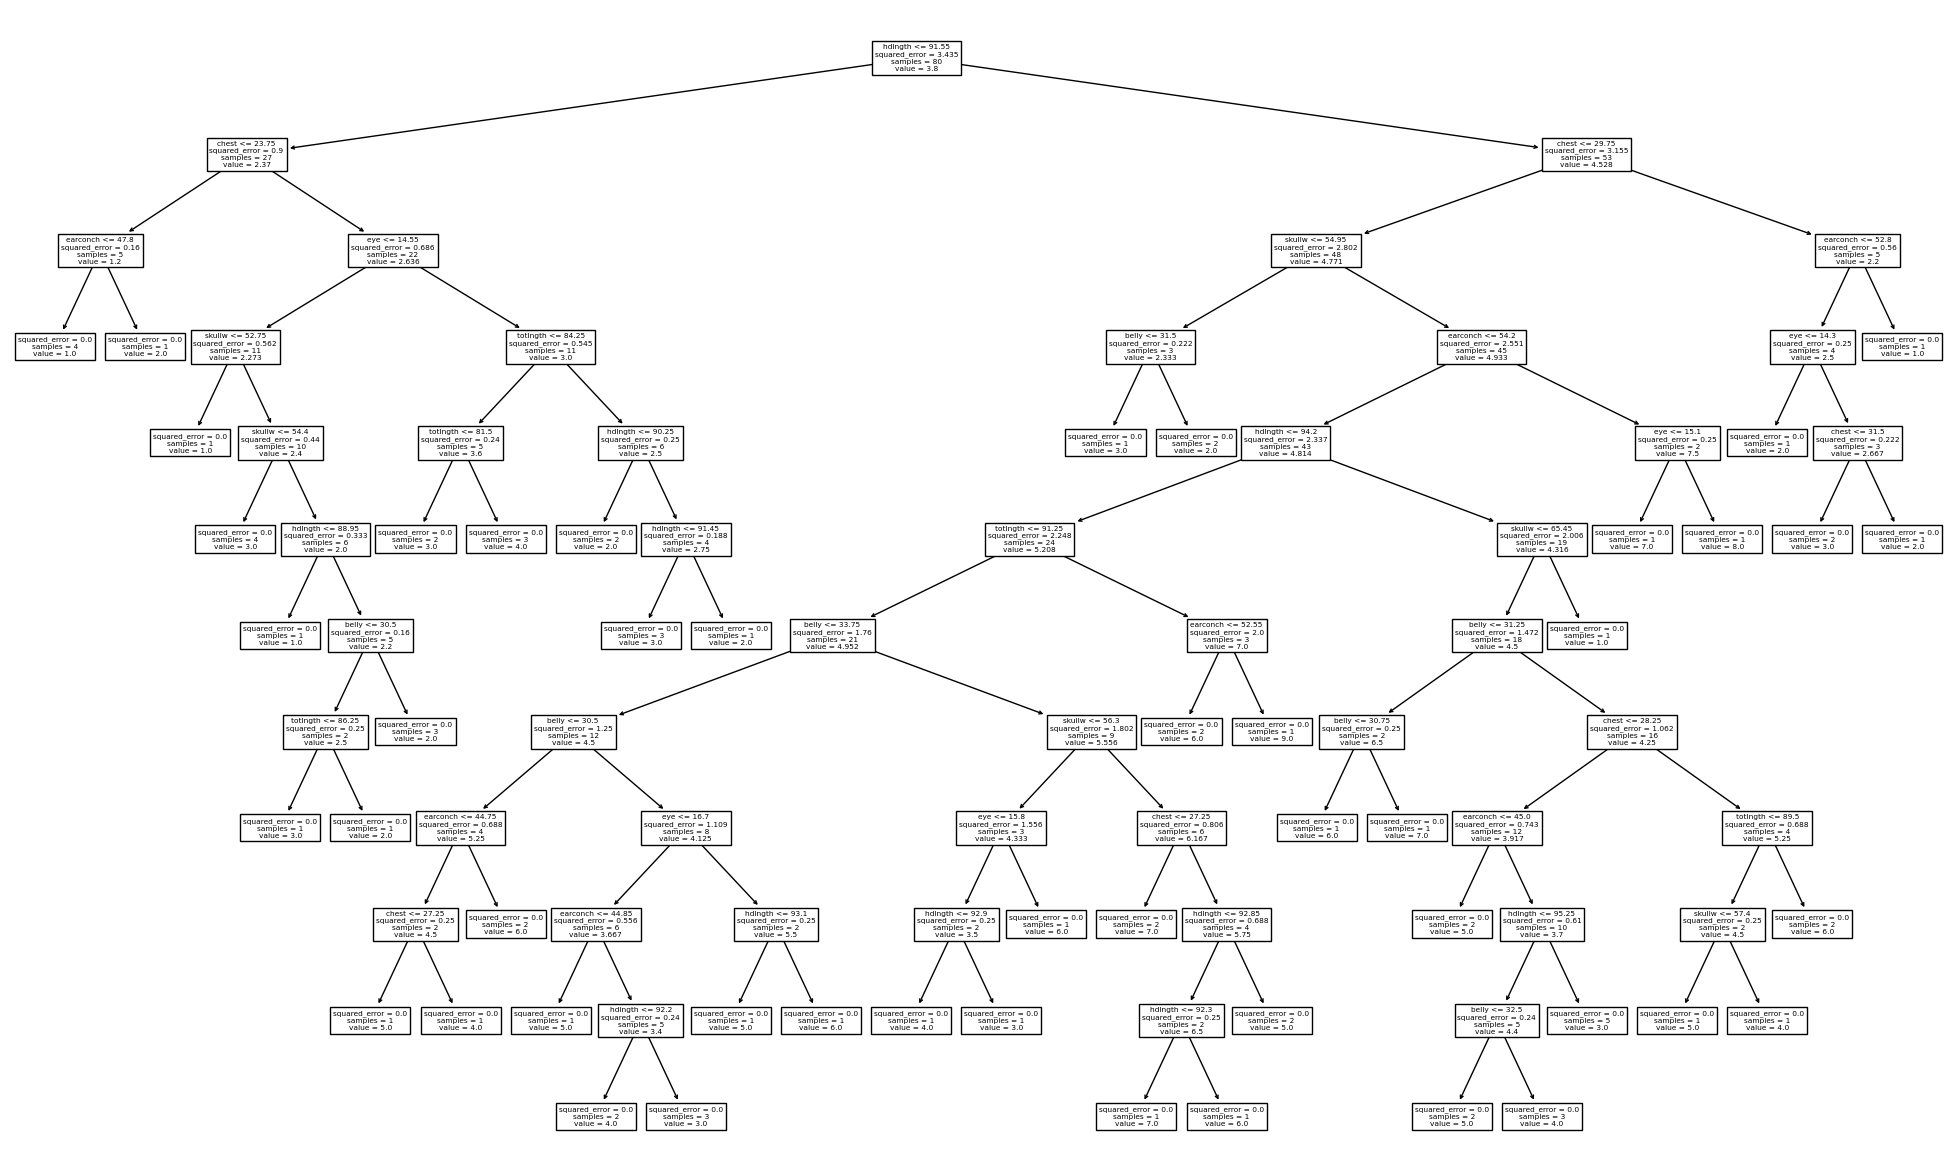

In [83]:
# visualize regression tree
plt.figure(figsize=(25, 15))
plot_tree(decisionTreeRegressionModel, feature_names=x.columns)
